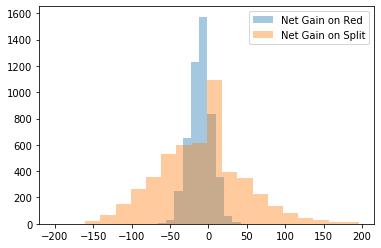

/Users/jasonsmith/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

rows=[[str(0), 'green'],[str(0)+str(0), 'green']]
for i in range(36):
    if (i+1)%2==0:
        rows.append([str(i+1), 'black'])
    else:
        rows.append([str(i+1), 'red'])

rt = pd.DataFrame(rows, columns=['pocket', 'color'])

def get_winnings(color):
    if color=='red':
        return 1
    else:
        return -1

def split_winnings(pocket):
    if pocket=='0':
        return 17
    elif pocket=='00':
        return 17
    else:
        return -1
    
rt['Winnings_Red']=rt.color.apply(lambda x: get_winnings(x))

rt['Winnings_Split']=rt.pocket.apply(lambda x: split_winnings(x))

num_sims=5000
num_spins=200
num_black=0
num_red=0
num_green=0
winnings_red=[]
winnings_split=[]

plt.hist([rt.sample(200, replace=True)['Winnings_Red'].sum() for i in range(5000)], bins=10)
plt.show()

for i in range(num_sims):
    spin = rt.sample(num_spins, replace=True)
    num_black += len((spin[spin['color']=='black']).index)
    num_green += len((spin[spin['color']=='green']).index)
    num_red += len((spin[spin['color']=='red']).index)
    winnings_red.append(spin['Winnings_Red'].sum())
    winnings_split.append(spin['Winnings_Split'].sum())


plt.hist(winnings_red, bins=10, alpha=0.4)
plt.hist(winnings_split, bins=20, alpha=0.4)
plt.legend(['Net Gain on Red', 'Net Gain on Split'])
plt.show()

    
  
plt.barh(range(3), [num_black, num_green, num_red])

ax = plt.subplot()
ax.set_yticks(range(3))
ax.set_yticklabels(["Black", "Green", "Red"])
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()


